<a href="https://colab.research.google.com/github/ydpajaro/Miniproyecto2/blob/main/miniproyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Para el sistema de Análisis Multivariado de Señales Sismográficas obtenido en el Primer Mini-Proyecto, se debe construir un módulo de variable latente utilizando el algorítmo de PCA. La idea es proyectar la matriz característica obtenida $\mathbf{X} \in \mathbb{R}^{N \times D}$, a un espacio latente de menor dimensión $q<<D$, de tal forma que los nuevos datos en este espacio sean $\mathbf{Z} \in \mathbb{R}^{N \times q}$. Selecciones diferentes configuraciones del número de componentes $q$ y evalúe el mejor desempeño arrojado por el modelo midiendo, el accuracy y la matriz de confusión. Para ellos:

  (a) Realice la visualización de las componentes en el espacio latente para diferentes configuraciones de $q$. ¿Que puede observar al respecto?

  (b) Entrene dos modelos lineales de clasificación Bayesiano y Regresión Logística, con el fin de evaluar el desempeño en el reconocimiento de los tipos de sismos tanto en el espacio de entrada (sin utilizar PCA), cómo en el espacio latente.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import seaborn as sns

from ipywidgets import widgets

from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
import pandas as pd

In [4]:
#Cargamos el data set
df = pd.read_csv('/content/drive/MyDrive/miniproyecto2/datos.csv',sep = ",")
df


FileNotFoundError: ignored

In [ ]:
df.info()

In [ ]:
X = df.iloc[:, :-1].values
y = df['Tipo_Sismo'].values

In [ ]:
def plot_pca(n_components):
  # crea el objeto PCA y establce el número de componentes a utilizar
  pca = PCA(n_components=n_components)

  #Aplica PCA a los datos normalizados
  X_pca = pca.fit_transform(X)

  # Transformar los datos al espacio latente
  X_latent = pca.transform(X)

  #Convertir los datos transformados a un Dataframe
  column_names = ['PC{}'.format(i+1) for i in range(n_components)]
  column_names.append('label')
  df_latent = pd.DataFrame(np.column_stack((X_pca,df.iloc[:,-1].values)),columns = column_names)

  # Agregar la etiqueta al DataFrame
  df_latent['label'] = df.iloc[:,-1].values

  # Limpia la figura actual
  plt.clf()

  # Visualizar con pairplot
  sns.pairplot(df_latent,hue='label')

  #Crear widget interactivo 
widgets.interact(plot_pca,n_components = np.arange(2,20,1))

In [ ]:
def train_test_split_and_fit(X_col,test_size):
  X_train, X_test, y_train, y_test = train_test_split(X[:,:X_col], y, test_size=test_size,random_state=40)
  # Entrenar el clasificador Bayesiano
  clfNB = GaussianNB()
  clfNB.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamiento
  # Entrenar el clasificador de Regresión Logística
  clfLR = LogisticRegression(random_state=0)
  clfLR.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamiento
  
  yPredTest_NB = clfNB.predict(X_test)
  yPredTest_LR= clfLR.predict(X_test)

  accTest_NB = accuracy_score(y_test,yPredTest_NB)
  accTest_LR = accuracy_score(y_test,yPredTest_LR)
  
  print('Acc para el modelo Bayesiano: ',accTest_NB)  
  print('Acc para el modelo de Regresión Logística: ',accTest_LR)

  cmNB = confusion_matrix(y_test, yPredTest_NB)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels = df['Tipo_Sismo'].unique())
  disp.plot()
  plt.title('Matriz Confusión NB')
  plt.show()

  cmLR = confusion_matrix(y_test, yPredTest_LR)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR,display_labels = df['Tipo_Sismo'].unique())
  disp.plot()
  plt.title('Matriz Confusión LR')
  plt.show()


X_col_widget = widgets.IntSlider(value=7,
    min=0,
    max=X.shape[1],
    step=1,
    description='Componentes:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

test_size_widget = widgets.FloatSlider(value=0.3,
    min=0.1,
    max=0.5,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)

interactive_func = widgets.interactive(train_test_split_and_fit,X_col=X_col_widget,test_size =test_size_widget)
display(interactive_func)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)

In [ ]:
# Entrenar el clasificador Bayesiano
clfNB = GaussianNB()
clfNB.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

# Entrenar el clasificador de Regresión Logística
clfLR = LogisticRegression(random_state=0)
clfLR.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

## Evaluacion del Desempeño

1. Accuracy score
2. Confussion Matrix

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

yPredTest_NB = clfNB.predict(X_test)
yPredTest_LR= clfLR.predict(X_test)

accTest_NB = accuracy_score(y_test,yPredTest_NB)
accTest_LR = accuracy_score(y_test,yPredTest_LR)

print('Acc para el modelo Bayesiano: ',accTest_NB)
print('Acc para el modelo de Regresión Logística: ',accTest_LR)

In [ ]:
import matplotlib.pyplot as plt
cmNB = confusion_matrix(y_test, yPredTest_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels = df['Tipo_Sismo'].unique())
disp.plot()
plt.title('Matriz Confusión NB')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
cmLR = confusion_matrix(y_test, yPredTest_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cmLR,display_labels = df['Tipo_Sismo'].unique())
disp.plot()
plt.title('Matriz Confusión LR')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

![texto_alternativo](https://i.imgur.com/dCew2Tx.png).

In [6]:
#Importar librerias
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [8]:
# Cargar la base de datos fetch_lfw_people y las etiquetas correspondientes
"""
Se utiliza para especificar que solo se incluyan en la base de datos aquellas 
personas que tengan al menos 100 imágenes. Esto se hace para asegurarse de que 
haya suficientes muestras para entrenar un modelo de aprendizaje automático.
"""
faces = fetch_lfw_people(min_faces_per_person=100, resize=0.4)

x = faces.data #datos de las imágenes
y = faces.target #etiquestas que identifican la persona que aparece en cada imagen

In [9]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [10]:
#Normalización del conjunto de datos
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
# Crear objeto PCA con el número de componentes deseados
pca = PCA(n_components=150, svd_solver="randomized", whiten=True)

# Ajustar PCA a los datos de entrenamiento
pca.fit(x_train)

# Transformar los datos de entrenamiento y prueba al espacio de menor dimensión
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [14]:
# Entrenar el modelo de Regresión Logística utilizando los datos de entrenamiento
model = LogisticRegression(random_state=0, max_iter=2000)
model.fit(x_train_pca, y_train)

#Calcular accuracy del modelo en el conjunto de prueba
y_pred = model.predict(x_test_pca)
acc = accuracy_score(y_test, y_pred)

# Imprimir accuracy
print("Accuracy: {:.2f}".format(acc))

Accuracy: 0.86


In [15]:
print(classification_report(y_test,y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.85      0.81      0.83        43
  Donald Rumsfeld       0.93      0.87      0.90        30
    George W Bush       0.91      0.89      0.90       108
Gerhard Schroeder       0.75      0.75      0.75        16
       Tony Blair       0.74      0.90      0.81        31

         accuracy                           0.86       228
        macro avg       0.84      0.84      0.84       228
     weighted avg       0.87      0.86      0.87       228



Para cada clase, el informe de clasificación muestra la precisión, el recall y el F1-score. La precisión es la fracción de predicciones positivas que son correctas, mientras que el recall es la fracción de instancias positivas que se identifican correctamente. El F1-score es una medida que combina tanto la precisión como el recall en una sola métrica.

El modelo clasificó imágenes de cinco personas diferentes: Colin Powell, Donald Rumsfeld, George W Bush, Gerhard Schroeder y Tony Blair. El modelo tuvo un accuracy global del 86%, lo que significa que clasificó correctamente el 86% de las imágenes del conjunto de prueba.

En términos de métricas para cada clase, el modelo tuvo una precisión, recall y f1-score altos para Colin Powell, George W Bush y Gerhard Schroeder. Para Donald Rumsfeld, tuvo una precisión y recall  altos, lo que indica que el modelo tuvo más facilidad para clasificar las imágenes de esta persona. Para Tony Blair, el modelo tuvo un recall alto pero una precisión más baja, lo que sugiere que el modelo clasificó algunas imágenes incorrectamente como Tony Blair.

En general, este informe de clasificación sugiere que el modelo de clasificación se desempeña bien en la clasificación de las imágenes de caras de políticos específicos. Sin embargo, es importante tener en cuenta que la precisión y el recall pueden ser engañosos en el caso de conjuntos de datos desequilibrados o cuando hay clases con muy pocas muestras. Por lo tanto, es importante evaluar el rendimiento del modelo en conjunto con otras métricas y técnicas de validación.

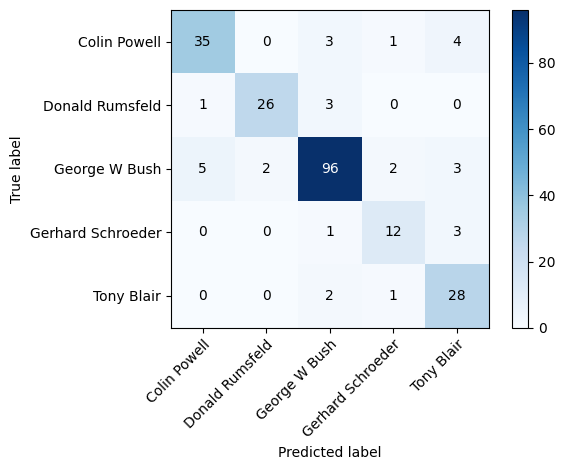

In [16]:
#Se traza la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=faces.target_names, yticklabels=faces.target_names,
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

La matriz de confusión muestra la precisión de la clasificación para cada clase en un problema de clasificación multiclase. En este caso, la matriz de confusión que se muestra en la imagen tiene cinco clases diferentes, que son los nombres de cinco políticos prominentes.

Cada fila de la matriz representa la cantidad de instancias de la clase verdadera, mientras que cada columna representa la cantidad de instancias de la clase predicha. Por lo tanto, el valor diagonal de la matriz representa el número de predicciones correctas (es decir, las instancias en las que la clase verdadera y la clase predicha son iguales), mientras que los valores fuera de la diagonal representan las predicciones incorrectas.

En esta matriz de confusión, podemos ver que la mayoría de las predicciones son correctas. La diagonal principal indica que la mayoría de las instancias se clasifican correctamente. . En este caso, la matriz de confusión muestra que el modelo predijo correctamente 35 de las imágenes que correspondían a la clase "Colin Powell", y clasificó erróneamente 3 de ellas como "George W Bush" y 1 de ellas como "Donald Rumsfeld". Además, el modelo predijo correctamente 18 imágenes de la clase "George W Bush", pero clasificó erróneamente 2 de ellas como "Colin Powell", 1 de ellas como "Gerhard Schroeder" y 4 de ellas como "Tony Blair". También, el modelo predijo correctamente 96 imágenes de la clase "George Bush", pero clasificó erróneamente 5 de ellas como "Colin Powell" , 2 de ellas como "Donald Rumsfeld", 2 de ellas como "Gerhard Schroeder" y 3 como "Tony Blair".

En este caso, la matriz de confusión obtenida muestra que el modelo clasificó correctamente 197 muestras, mientras que 31 muestras fueron clasificadas incorrectamente.

En general, el modelo parece tener un desempeño bastante bueno, ya que la mayoría de las predicciones son correctas. Sin embargo, también se puede ver que hay algunas imágenes que el modelo no es capaz de clasificar correctamente, lo que sugiere que aún hay margen de mejora en el modelo.

In [17]:
print(faces.images.shape)
print(faces.data.shape)

(1140, 50, 37)
(1140, 1850)


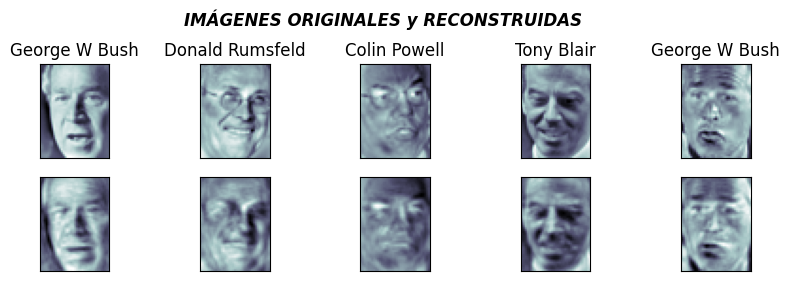

In [18]:
n_images=5

# Transformar los datos reconstruidos al espacio de dimensión original
x_test_reconstructed = pca.inverse_transform(x_test_pca)

fig, axes = plt.subplots(2, n_images, figsize=(10, 3),
                         subplot_kw={'xticks':[], 'yticks':[]},
                        )

fig.suptitle("IMÁGENES ORIGINALES y RECONSTRUIDAS", fontweight='bold', fontstyle='italic')
plt.subplots_adjust(top=0.8)

# Mostrar imágenes originales
for i, ax in enumerate(axes[0]):
    ax.imshow(x_test[i].reshape(50, 37), cmap='bone')
    name = faces.target_names[y_test[i]]
    ax.set_title("{}".format(name))

# Mostrar imágenes reconstruidas
for i, ax in enumerate(axes[1]):
    ax.imshow(x_test_reconstructed[i].reshape(50, 37), cmap='bone')
    name = faces.target_names[y_test[i]]

Se puede observar que las imágenes originales tienen características y detalles únicos que las hacen distintas entre sí. Algunas imágenes tienen una iluminación más clara o más oscura, mientras que otras tienen diferentes poses o expresiones faciales. Las imágenes reconstruidas, por otro lado, tienen un aspecto más suave y uniforme, lo que sugiere que el modelo ha logrado capturar las características más importantes de las imágenes originales.

Aunque las imágenes reconstruidas no son exactamente iguales a las originales, el modelo ha logrado retener la información más relevante de cada imagen, lo que demuestra la capacidad de la técnica de PCA para reducir la dimensionalidad de los datos y eliminar la redundancia en los datos de imágenes.

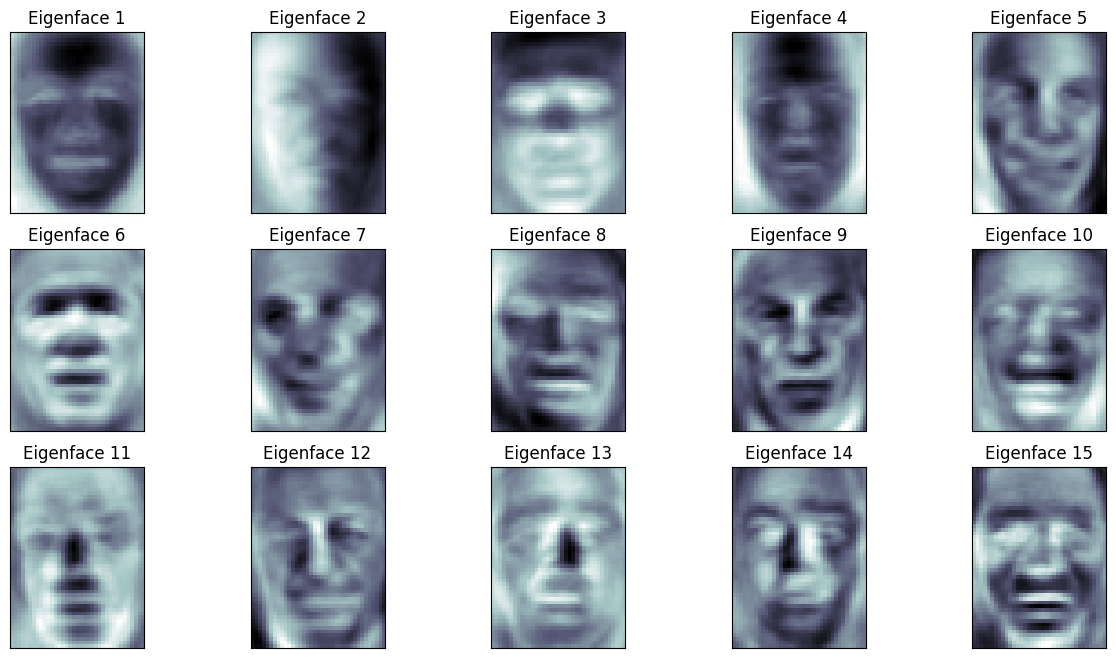

In [19]:
# Obtener las eigenfaces
eigenfaces = pca.components_.reshape((150, 50, 37))

# Mostrar las eigenfaces
n_rows = 3
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                        )
for i, ax in enumerate(axes.flat):
    if i < 50:
        ax.imshow(eigenfaces[i], cmap='bone')
        ax.set_title("Eigenface {}".format(i+1))

La imagen muestra las 15 eigenfaces obtenidas a partir del conjunto de datos de caras de personas usando el método de análisis de componentes principales (PCA). Las eigenfaces son patrones de caras que se utilizan para representar las variaciones de las caras del conjunto de datos original. Cada eigenface es una combinación lineal de las imágenes de caras originales y tiene una forma distintiva y única. En la imagen, se pueden ver las 15 eigenfaces más importantes en orden descendente de su contribución a la varianza total de los datos.

In [28]:
from ipywidgets import interact, fixed

def run_experiment(n_components, C):
    # Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
    
    # Normalización del conjunto de datos
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # Crear objeto PCA con el número de componentes deseados
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)
    
    # Ajustar PCA a los datos de entrenamiento
    pca.fit(x_train)
    
    # Transformar los datos de entrenamiento y prueba al espacio de menor dimensión
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    # Entrenar el modelo de Regresión Logística utilizando los datos de entrenamiento
    model = LogisticRegression(random_state=0, max_iter=2000, C=C)
    model.fit(x_train_pca, y_train)
    
    # Calcular accuracy del modelo en el conjunto de prueba
    y_pred = model.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    
    # Imprimir accuracy
    print("Accuracy: {:.2f}".format(acc))
    
   # Se traza la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=faces.target_names, yticklabels=faces.target_names,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
# Definir los límites de los parámetros
n_components_min = 10
n_components_max = 500
C_min = 0.1
C_max = 10

# Crear el widget interactivo
interact(run_experiment, n_components=(n_components_min, n_components_max, 10), C=(C_min, C_max, 0.1));

interactive(children=(IntSlider(value=250, description='n_components', max=500, min=10, step=10), FloatSlider(…

Ajustar el número de componentes de PCA a 10 y el parámetro de regularización C de la regresión logística a 0.2 da un Accuracy de 52%. Con un número de componentes de PCA de 170 y un C de 0.1 obtengo un Accuracy de 88%, la más alta precisión.

La precisión del 52% que se  obtuvo inicialmente es bastante baja, lo que sugiere que el modelo no estaba capturando suficiente información relevante de las imágenes.
El hecho de que aumentar el número de componentes de PCA y disminuir el parámetro de regularización C resultara en una mayor precisión sugiere que el modelo estaba sufriendo de un bajo sesgo (no captura suficiente información relevante) y un alto sesgo (sobregeneralización, no generaliza bien a nuevos datos). Al aumentar el número de componentes de PCA, el modelo pudo capturar más información relevante y reducir el sesgo. Al disminuir el parámetro de regularización C, se permitió que el modelo se ajustara mejor a los datos de entrenamiento, reduciendo así el alto sesgo.

<div align="justify"><strong><em>a. ¿Cómo lucen los rostros proyectados en ambos espacios latentes?. Implemente su visualización.</em></strong></div>

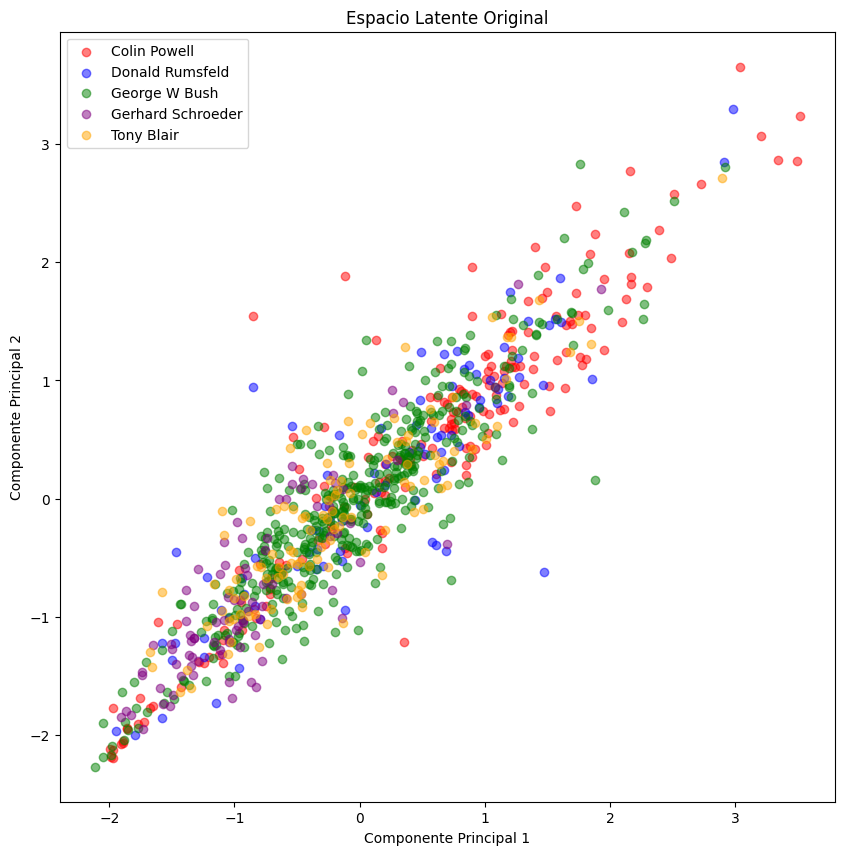

In [32]:
## Gráfico del espacio latente original
plt.figure(figsize=(10,10))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i, name in enumerate(faces.target_names):
    plt.scatter(x_train[y_train==i, 0], x_train[y_train==i, 1], 
                color=colors[i], label=name, alpha=0.5)

plt.legend()
plt.title('Espacio Latente Original')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
    
plt.show()

In [31]:
from ipywidgets import interact, IntSlider

@interact(n_components=IntSlider(min=2, max=300, step=2, value=50))
def visualize_pca(n_components):
    # Crear objeto PCA con el número de componentes deseados
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)

    # Ajustar PCA a los datos de entrenamiento
    pca.fit(x_train)

    # Transformar los datos de entrenamiento y prueba al espacio de menor dimensión
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)

    # Entrenar el modelo de Regresión Logística utilizando los datos de entrenamiento
    model = LogisticRegression(random_state=0, max_iter=2000)
    model.fit(x_train_pca, y_train)

    #Calcular accuracy del modelo en el conjunto de prueba
    y_pred = model.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)

    # Imprimir accuracy
    print("Accuracy: {:.2f}".format(acc))

    # Mostrar gráfico con la proyección PCA de los datos de prueba
    plt.figure(figsize=(10,6))
    colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple', 'green', 'yellow', 'black', 'magenta', 'pink']
    for color, i, target_name in zip(colors, range(len(faces.target_names)), faces.target_names):
        plt.scatter(x_test_pca[y_test == i, 0], x_test_pca[y_test == i, 1], color=color, alpha=.8, lw=2,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('Espacio Latente PCA (n_components={})'.format(n_components))
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.show()

interactive(children=(IntSlider(value=50, description='n_components', max=300, min=2, step=2), Output()), _dom…

En la visualización del espacio latente original se puede apreciar una cierta tendencia o patrón lineal en la distribución de los puntos. Es posible trazar una línea diagonal que atraviese los puntos, lo que sugiere que hay cierta correlación entre las variables latentes que se utilizan para representar las imágenes de los rostros. tendencia lineal se puede deber a la naturaleza de los datos, que corresponden a imágenes de caras de personas, que tienen ciertas características y proporciones que se mantienen consistentes en la mayoría de las imágenes. Además, es posible que la técnica de selección de características utilizada para construir el espacio latente original haya tendido a seleccionar aquellas características que están más correlacionadas entre sí.Es importante tener en cuenta que la presencia de una tendencia lineal no necesariamente implica una estructura clara o fácilmente interpretable en los datos. En este caso, la tendencia lineal es bastante suave y no indica una separación clara entre grupos de datos o la presencia de características muy distintivas.

En la visualización del espacio latente PCA se observa que los datos están dispersos en el espacio latente. Aunque algunos grupos de puntos parecen estar más cerca entre sí, no se identifica una estructura clara que permita agrupar los datos de manera significativa.La dispersión en el espacio latente PCA puede ser explicada porque PCA, al reducir la dimensión de los datos, procura retener la mayor cantidad posible de información en las primeras componentes principales. Aunque en algunos casos estas componentes pueden capturar estructuras significativas en los datos, en otros casos las componentes pueden ser menos informativas y no permitir una separación clara de los datos. Es importante destacar que en la visualización que se presenta, aunque no se identifican agrupaciones claras, esto no necesariamente implica que el modelo no tenga buenos resultados en la clasificación de las imágenes.